In [2]:
import os
import sys
import io
import numpy as np
import math
import re
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib inline

data_dir = os.path.join(os.getcwd(), "data")
models_dir = os.path.join(os.getcwd(), "models")

In [2]:
data_files = os.listdir(data_dir)
print(len(data_files))
print(data_files[0])

446426
worker9446_161_20.npy


In [3]:
from collections import defaultdict
data_files_groups = defaultdict(list)
for df in data_files:
    data_files_groups[df.rsplit("_", 1)[0]].append(os.path.join(data_dir, df))
out = list(data_files_groups.keys())[0], len(list(data_files_groups.values())[0])
print(out)

('worker9446_161', 100)


In [4]:
data = list()

max_num_takes = len(data_files_groups.keys())

framenum_regex = r".*_(\d+).npy"
for num, fnames in enumerate(data_files_groups.values()):
    if len(fnames) < 50:
        continue
    keyframes = list()
    if not num%10:
        sys.stdout.write(F"\r{num}/{max_num_takes}")
        sys.stdout.flush()
    fnames.sort(key=lambda x: int(re.match(framenum_regex, x).groups()[0]))
    for fname in fnames:
        if "all_data" in fname:
            continue
        keyframe = np.load(fname)
        keyframe[0] = keyframe[0][:14]  # We're using only vertices of mesh bifor subdiv
        keyframe[1] = keyframe[1] <= int(fname.rsplit("_", 1)[-1].split(".")[0])  # from a frame number to True/False
        keyframes.append(keyframe)
    data.append(keyframes)

4450/4471

In [5]:
np.save(os.path.join(data_dir, "all_data.npy"), data)

In [6]:
# --- Just for faster loading - fast
data = np.load(os.path.join(data_dir, "all_data.npy"))

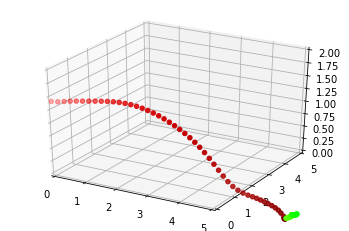

In [7]:
# Plot an example of recorded data
# Data has format: [take_1, take_2 ... take_n]
# take = [frame_1, frame_2 ... frame_n]
# frame = [[vert_1_pos, vert_2_pos ... vert_n_pos], wind_blowing(bool)]
# vert_n_pos = [x, y, z
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(0,5),ylim=(0,5), zlim=(0, 2))

xs = list()
ys = list()
zs = list()
sizes = list()
for num, f in enumerate(data[301]):
    v = f[0][0]
    xs.append(-v[0])
    ys.append(v[2])
    zs.append(v[1])
    sizes.append([(len(data[301]) - float(num))/len(data[301]), f[1], 0])
ax.scatter(xs, ys, zs, c=sizes)

plt.show()

In [8]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=8)

Using TensorFlow backend.


In [9]:
# reate logger - nocer formatting
import logging

logger = logging.getLogger()
logging._warn_preinit_stderr = 0
logger.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s: %(message)s')
ch = logging.StreamHandler()
ch.setFormatter(formatter)
logger.handlers = [ch]
logger.info("Logger started.")

2020-03-15 15:57:33,208: Logger started.


2020-03-15 15:57:33,234: start
2020-03-15 15:57:33,235: sample_length: 1
2020-03-15 15:57:33,235: Prepare data..
2020-03-15 15:57:36,288: Shuffle data...
2020-03-15 15:57:36,312: Split to test an train sets (90%/10%)...
2020-03-15 15:57:36,313: Create model...
2020-03-15 15:57:36,313: From /home/pawel/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

2020-03-15 15:57:36,316: From /home/pawel/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

2020-03-15 15:57:36,319: From /home/pawel/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

2020-03-15 15:57:36,477: From /home/pawel/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:793: The name

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                17664     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 17,859
Trainable params: 17,859
Non-trainable params: 0
_________________________________________________________________


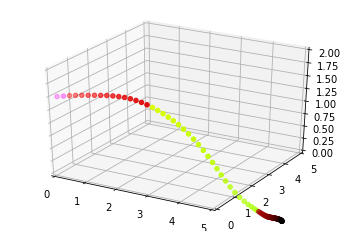

2020-03-15 16:00:42,451: sample_length: 3
2020-03-15 16:00:42,452: Prepare data..
2020-03-15 16:00:46,420: Shuffle data...
2020-03-15 16:00:46,449: Split to test an train sets (90%/10%)...
2020-03-15 16:00:46,450: Create model...
2020-03-15 16:00:46,588: Fit model..
2020-03-15 16:06:00,616: Summary
2020-03-15 16:06:00,617: Create some predictions...


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                17664     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 17,859
Trainable params: 17,859
Non-trainable params: 0
_________________________________________________________________


2020-03-15 16:06:00,848: Avg. prediction time: 0.002071196382695978
2020-03-15 16:06:00,848: create and show plot...


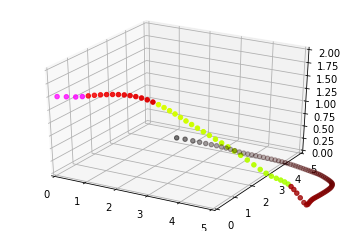

2020-03-15 16:06:01,362: sample_length: 5
2020-03-15 16:06:01,362: Prepare data..
2020-03-15 16:06:06,113: Shuffle data...
2020-03-15 16:06:06,151: Split to test an train sets (90%/10%)...
2020-03-15 16:06:06,152: Create model...
2020-03-15 16:06:06,289: Fit model..
2020-03-15 16:14:19,339: Summary
2020-03-15 16:14:19,340: Create some predictions...


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                17664     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 17,859
Trainable params: 17,859
Non-trainable params: 0
_________________________________________________________________


2020-03-15 16:14:19,658: Avg. prediction time: 0.0028680714693936436
2020-03-15 16:14:19,658: create and show plot...


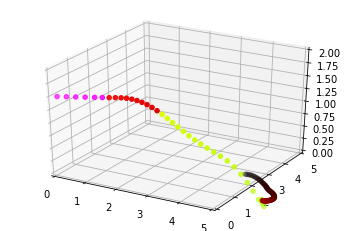

2020-03-15 16:14:20,474: sample_length: 7
2020-03-15 16:14:20,475: Prepare data..
2020-03-15 16:14:26,622: Shuffle data...
2020-03-15 16:14:26,671: Split to test an train sets (90%/10%)...
2020-03-15 16:14:26,672: Create model...
2020-03-15 16:14:26,815: Fit model..
2020-03-15 16:23:28,160: Summary
2020-03-15 16:23:28,161: Create some predictions...


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 64)                17664     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
Total params: 17,859
Trainable params: 17,859
Non-trainable params: 0
_________________________________________________________________


2020-03-15 16:23:28,581: Avg. prediction time: 0.003792884133078835
2020-03-15 16:23:28,581: create and show plot...


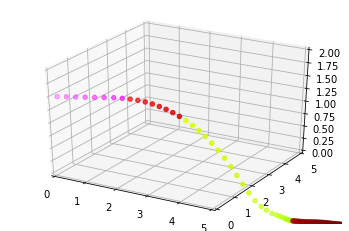

2020-03-15 16:23:29,615: sample_length: 9
2020-03-15 16:23:29,616: Prepare data..
2020-03-15 16:23:36,831: Shuffle data...
2020-03-15 16:23:36,890: Split to test an train sets (90%/10%)...
2020-03-15 16:23:36,890: Create model...
2020-03-15 16:23:37,068: Fit model..
2020-03-15 16:46:17,440: Summary
2020-03-15 16:46:17,441: Create some predictions...


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 64)                17664     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 17,859
Trainable params: 17,859
Non-trainable params: 0
_________________________________________________________________


2020-03-15 16:46:17,914: Avg. prediction time: 0.004275688258084384
2020-03-15 16:46:17,915: create and show plot...


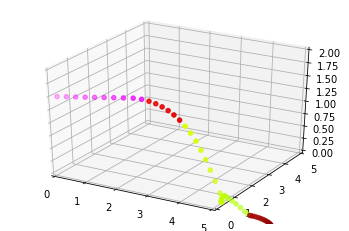

2020-03-15 16:46:18,965: sample_length: 11
2020-03-15 16:46:18,966: Prepare data..
2020-03-15 16:46:25,829: Shuffle data...
2020-03-15 16:46:25,890: Split to test an train sets (90%/10%)...
2020-03-15 16:46:25,891: Create model...
2020-03-15 16:46:26,031: Fit model..
2020-03-15 16:53:35,459: Summary
2020-03-15 16:53:35,460: Create some predictions...


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 64)                17664     
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 195       
Total params: 17,859
Trainable params: 17,859
Non-trainable params: 0
_________________________________________________________________


2020-03-15 16:53:36,013: Avg. prediction time: 0.004992914199829101
2020-03-15 16:53:36,013: create and show plot...


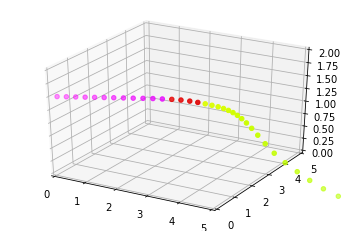

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from collections import deque
import time

# Simple network that predicts a position of a single point

def create_and_train_network(sample_length=3, epohs=100):
    def create_model():
        model = Sequential()
        model.add(LSTM(64, input_shape=(sample_length, 4), return_sequences=False))
        #model.add(LSTM(32, input_shape=(sample_length, 4), return_sequences=False))
        model.add(Dense(3, activation='linear'))
        model.compile(loss='mae', optimizer='adam')
        return model

    def prepare_data():
        # Convert whole data to:
        # * x - a flat list of positions of single point with legnth sample_length 
        # * y - next position of single point
        
        x = list()
        y = list()
        
        for take in data:
            if not len(take):
                continue
            start_pos = take[0][0][0]
            next_pos = take[1][0][0]
            delta = np.asarray(next_pos) - np.asarray(start_pos)
            keyframes = [[take[i][0][0], int(take[i][1])] for i in range(len(take))]

            num = 0
            while True:
                if num + sample_length >= len(keyframes) - 1:
                    break
                x.append([[keyframes[num + i][0][0], keyframes[num + i][0][1], keyframes[num + i][0][2],
                           keyframes[num + i][1]] for i in range(sample_length)])
                y.append(keyframes[num + sample_length][0])

                distance = np.linalg.norm(
                    np.asarray(keyframes[num][0][0]) - np.asarray(keyframes[num + sample_length][0][0]))
                if distance < 0.01:
                    break
                num += 1
                
        return np.array(x), np.array(y)

    logger.info("sample_length: {}".format(sample_length))
    logger.info("Prepare data..")
    x, y = prepare_data()
    logger.info("Shuffle data...")
    p = np.random.permutation(len(x))
    x = x[p]
    y = y[p]
    
    logger.info("Split to test an train sets (90%/10%)...")
    n = int(len(x) * 0.9)
    x_train = x[:n]
    x_test = x[n:]
    
    y_train = y[:n]
    y_test = y[n:]

    logger.info("Create model...")
    model = create_model()
    logger.info("Fit model..")
    network = model.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=epohs,
                        batch_size=64,
                        verbose=False,
                        callbacks=[early_stopping]
                        )
    logger.info("Summary")
    model.summary()

    logger.info("Create some predictions...")
    start_pos = np.asarray([ -0.1, 1.5, 0.1, 0])
    start_frames = list()
    for i in range(sample_length):
        start_frames.append(start_pos + i * np.asarray([-0.3, 0.03, 0, 0]))
        
    batch = deque(start_frames, sample_length)
    out = [i[:3] for i in batch]

    prediction_times = list()
    for i in range(110):
        u = np.asarray(batch)
        u.resize(1, sample_length, 4)
        t0 = time.time()
        result = model.predict(u)
        prediction_times.append(time.time() - t0)
        batch.append([result[0][0], result[0][1], result[0][2], i > 15 and num < 40])
        out.append(result[0])
    logger.info("Avg. prediction time: {}".format(np.average(prediction_times)))
    def plot_points(keyframes):
        xs = list()
        ys = list()
        zs = list()
        sizes = list()
        for num, v in enumerate(keyframes):
            xs.append(-v[0])
            ys.append(v[2])
            zs.append(v[1])
            sizes.append([(len(keyframes) - float(num)) / len(keyframes), num > 15 and num < 40, num <= sample_length])
        ax.scatter(xs, ys, zs, c=sizes)
    
    logger.info("create and show plot...")
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d', xlim=(0,5),ylim=(0,5), zlim=(0, 2))
    plot_points(out)
    plt.show()
    model.save(os.path.join(models_dir, "model_single_point_{}".format(sample_length)))
    return out

logger.info("start")
results = list()
for n in range(6):
    # Run with different sample lengths to see the diference 
    results.append(create_and_train_network(1 + n * 2))

2020-03-15 16:53:37,294: start
2020-03-15 16:53:37,295: sample_length: 1
2020-03-15 16:53:37,296: Prepare data..
2020-03-15 16:53:53,566: Shuffle data...
2020-03-15 16:53:53,570: Split to test an train sets (90%/10%)...
2020-03-15 16:53:53,571: Create model...
2020-03-15 16:53:53,712: From /home/pawel/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

2020-03-15 16:53:53,717: From /home/pawel/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
2020-03-15 16:53:53,999: Fit model..
2020-03-15 16:54:35,644: Summary
2020-03-15 16:54:35,645: Create some predictions...


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 1, 100)            48000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 100)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 1, 100)            80400     
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 18)                1818      
Total params: 210,618
Trainable params: 210,618
Non-trainable params: 0
________________________________________________

2020-03-15 16:54:36,397: Avg. prediction time: 0.006784170324152166
2020-03-15 16:54:36,398: create and show plot...


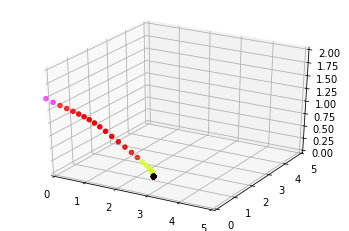

2020-03-15 16:54:38,464: sample_length: 3
2020-03-15 16:54:38,465: Prepare data..
2020-03-15 16:55:01,400: Shuffle data...
2020-03-15 16:55:01,483: Split to test an train sets (90%/10%)...
2020-03-15 16:55:01,484: Create model...
2020-03-15 16:55:01,910: Fit model..
2020-03-15 17:06:33,685: Summary
2020-03-15 17:06:33,687: Create some predictions...


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 3, 100)            48000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 3, 100)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 3, 100)            80400     
_________________________________________________________________
lstm_12 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 18)                1818      
Total params: 210,618
Trainable params: 210,618
Non-trainable params: 0
________________________________________________

2020-03-15 17:06:34,628: Avg. prediction time: 0.008496444875543768
2020-03-15 17:06:34,629: create and show plot...


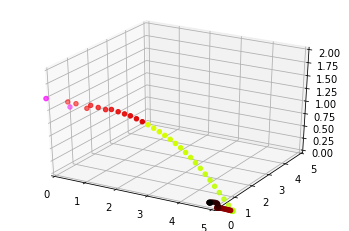

2020-03-15 17:06:37,046: sample_length: 5
2020-03-15 17:06:37,047: Prepare data..
2020-03-15 17:07:02,463: Shuffle data...
2020-03-15 17:07:02,562: Split to test an train sets (90%/10%)...
2020-03-15 17:07:02,563: Create model...
2020-03-15 17:07:02,963: Fit model..
2020-03-15 17:29:46,288: Summary
2020-03-15 17:29:46,290: Create some predictions...


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 5, 100)            48000     
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 100)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 5, 100)            80400     
_________________________________________________________________
lstm_15 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 18)                1818      
Total params: 210,618
Trainable params: 210,618
Non-trainable params: 0
________________________________________________

2020-03-15 17:29:47,348: Avg. prediction time: 0.009555188092318449
2020-03-15 17:29:47,349: create and show plot...


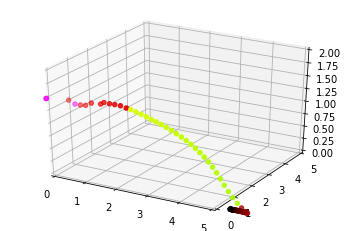

2020-03-15 17:29:50,093: sample_length: 7
2020-03-15 17:29:50,094: Prepare data..
2020-03-15 17:30:22,894: Shuffle data...
2020-03-15 17:30:23,055: Split to test an train sets (90%/10%)...
2020-03-15 17:30:23,055: Create model...
2020-03-15 17:30:23,445: Fit model..
2020-03-15 18:03:52,376: Summary
2020-03-15 18:03:52,377: Create some predictions...


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 7, 100)            48000     
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 100)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 7, 100)            80400     
_________________________________________________________________
lstm_18 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 18)                1818      
Total params: 210,618
Trainable params: 210,618
Non-trainable params: 0
_______________________________________________

2020-03-15 18:03:53,601: Avg. prediction time: 0.011056319150057706
2020-03-15 18:03:53,602: create and show plot...


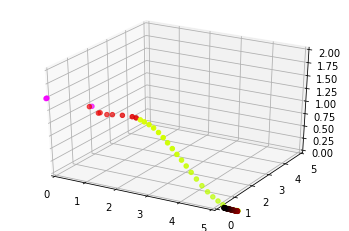

2020-03-15 18:03:56,807: sample_length: 9
2020-03-15 18:03:56,807: Prepare data..
2020-03-15 18:04:33,313: Shuffle data...
2020-03-15 18:04:33,503: Split to test an train sets (90%/10%)...
2020-03-15 18:04:33,504: Create model...
2020-03-15 18:04:33,892: Fit model..
2020-03-15 18:41:35,997: Summary
2020-03-15 18:41:35,999: Create some predictions...


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 9, 100)            48000     
_________________________________________________________________
dropout_9 (Dropout)          (None, 9, 100)            0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 9, 100)            80400     
_________________________________________________________________
lstm_21 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 18)                1818      
Total params: 210,618
Trainable params: 210,618
Non-trainable params: 0
_______________________________________________

2020-03-15 18:41:37,411: Avg. prediction time: 0.012761016325517134
2020-03-15 18:41:37,411: create and show plot...


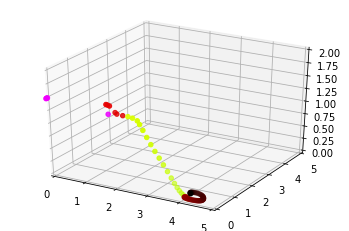

2020-03-15 18:41:41,153: sample_length: 11
2020-03-15 18:41:41,154: Prepare data..
2020-03-15 18:42:08,443: Shuffle data...
2020-03-15 18:42:08,546: Split to test an train sets (90%/10%)...
2020-03-15 18:42:08,547: Create model...
2020-03-15 18:42:08,935: Fit model..
2020-03-15 19:04:44,473: Summary
2020-03-15 19:04:44,474: Create some predictions...


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 11, 100)           48000     
_________________________________________________________________
dropout_11 (Dropout)         (None, 11, 100)           0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 11, 100)           80400     
_________________________________________________________________
lstm_24 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 18)                1818      
Total params: 210,618
Trainable params: 210,618
Non-trainable params: 0
_______________________________________________

2020-03-15 19:04:46,089: Avg. prediction time: 0.01460299708626487
2020-03-15 19:04:46,090: create and show plot...


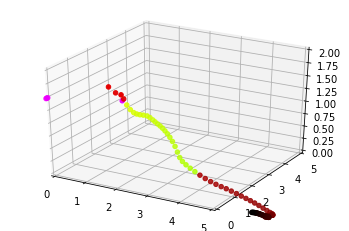

In [11]:

verts = [7, 10, 2, 3, 5, 1]
pivot_vert = 3

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from collections import deque
from keras.callbacks import EarlyStopping
import time


def create_and_train_network(data, verts, sample_length=3, epohs=100):
    def create_model():
        model = Sequential()
        model.add(LSTM(100, input_shape=(sample_length, 3 * len(verts) + 1), return_sequences=True))
        model.add(Dropout(0.2))
        model.add(LSTM(100, input_shape=(sample_length, 3 * len(verts) + 1), return_sequences=True))
        model.add(LSTM(100, input_shape=(sample_length, 3 * len(verts) + 1), return_sequences=False))
        model.add(Dropout(0.2))
        model.add(Dense(3 * len(verts), activation='linear'))
        model.compile(loss='mae', optimizer='adam')
        return model

    def prepare_data():
        x = list()
        y = list()
        for take in data:
            if not len(take):
                continue
            mask = np.ones(len(take[0][0]), bool)
            mask[pivot_vert] = False

            keyframes = list()
            for i in range(len(take)):
                _keyframes = list()
                for v in verts:
                    if v != pivot_vert:
                        _keyframes.append(np.asarray(take[i][0][v]) - np.asarray(take[i][0][pivot_vert]))
                    else:
                        _keyframes.append(np.asarray(take[i][0])[v])
                _keyframes = np.asarray(_keyframes).flatten()
                keyframes.append([_keyframes, take[i][1]])

            num = 0
            while True:
                if num + sample_length >= len(keyframes) - 1:
                    break
                x.append([list(np.asarray(keyframes[num + i][0]).flatten()) + [keyframes[num + i][1]] for i in range(sample_length)])
                y.append(keyframes[num + sample_length][0])

                distance = np.linalg.norm(
                    np.asarray(keyframes[num][0][:3]) - np.asarray(keyframes[num + sample_length][0][:3]))
                if distance < 0.01:
                    break
                num += 1
        x = np.array(x)
        y = np.array(y)
        # x = x.reshape(-1, 99, 4)
        # y = y.reshape(-1, 3)
        return x, y

    logger.info("sample_length: {}".format(sample_length))
    logger.info("Prepare data..")
    x, y = prepare_data()
    
    logger.info("Shuffle data...")
    p = np.random.permutation(len(x))
    x = x[p]
    y = y[p]

    logger.info("Split to test an train sets (90%/10%)...")
    n = int(len(x) * 0.9)
    x_train = x[:n]
    x_test = x[n:]

    y_train = y[:n]
    y_test = y[n:]

    logger.info("Create model...")
    model = create_model()
    
    logger.info("Fit model..")
    network = model.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=epohs,
                        batch_size=64,
                        verbose=False,
                        callbacks=[early_stopping]
                        )
    logger.info("Summary")
    model.summary()

    logger.info("Create some predictions...")
    start_pos = np.asarray([0.0, 0.053722500801086426, -0.10000000149011612, 0.0, 0.053722500801086426, -0.008631999604403973, -0.29947200417518616, 0.053722500801086426, 0.0, 0.2003210037946701, 1.4462774991989136, 0.0, 0.0, 0.053722500801086426, 0.008631999604403973, 0.0, 0.053722500801086426, 0.10000000149011612, 0.0])
    start_frames = list()
    for i in range(sample_length):
        start_frames.append(start_pos - i * np.asarray([0, 0, -0.01, 0, 0, -0.01, 0, 0, -0.01, 0, 0, -0.01, 0, 0, -0.01, 0, 0, -0.01, 0]))

    batch = deque(start_frames, sample_length)
    out = [i[:3 * len(verts)] for i in batch]

    prediction_times = list()
    for i in range(110):
        u = np.resize(np.asarray(batch), (1, sample_length, 3 * len(verts) + 1))
        t0 = time.time()
        result = model.predict(u)
        prediction_times.append(time.time() - t0)
        batch.append(list(result[0].flatten()) + [i > 15 and num < 40])
        out.append(result[0])
    logger.info("Avg. prediction time: {}".format(np.average(prediction_times)))

    def plot_points(keyframes):
        xs = list()
        ys = list()
        zs = list()
        sizes = list()
        for num, vs in enumerate(keyframes):
            v = vs[3 * 3:4 * 3]
            xs.append(-v[0])
            ys.append(v[2])
            zs.append(v[1])
            sizes.append([(len(keyframes) - float(num)) / len(keyframes), num > 15 and num < 40, num <= sample_length])
        ax.scatter(xs, ys, zs, c=sizes)

    logger.info("create and show plot...")
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d', xlim=(0, 5), ylim=(0, 5), zlim=(0, 2))
    plot_points(out)
    plt.show()
    model.save(os.path.join(models_dir, "model_multiple_points_{}".format(sample_length)))
    return out


logger.info("start")
results = list()
for n in range(6):
    # Run with different sample lengths to see the diference 
    results.append(create_and_train_network(data, verts, 1 + 2 * n))

In [12]:
# Try learning for all of verts:

verts = range(14)
pivot_vert = 3

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from collections import deque
from keras.callbacks import EarlyStopping
import time


def create_and_train_network(data, verts, sample_length=3, epohs=100):
    def create_model():
        model = Sequential()
        model.add(LSTM(100, input_shape=(sample_length, 3 * len(verts) + 1), return_sequences=True))
        model.add(Dropout(0.2))
        model.add(LSTM(100, input_shape=(sample_length, 3 * len(verts) + 1), return_sequences=True))
        model.add(LSTM(100, input_shape=(sample_length, 3 * len(verts) + 1), return_sequences=False))
        model.add(Dropout(0.2))
        model.add(Dense(3 * len(verts), activation='linear'))
        model.compile(loss='mae', optimizer='adam')
        return model

    def prepare_data():
        x = list()
        y = list()
        for take in data:
            if not len(take):
                continue
            mask = np.ones(len(take[0][0]), bool)
            mask[pivot_vert] = False

            keyframes = list()
            for i in range(len(take)):
                _keyframes = list()
                for v in verts:
                    if v != pivot_vert:
                        _keyframes.append(np.asarray(take[i][0][v]) - np.asarray(take[i][0][pivot_vert]))
                    else:
                        _keyframes.append(np.asarray(take[i][0])[v])
                _keyframes = np.asarray(_keyframes).flatten()
                keyframes.append([_keyframes, take[i][1]])

            num = 0
            while True:
                if num + sample_length >= len(keyframes) - 1:
                    break
                x.append([list(np.asarray(keyframes[num + i][0]).flatten()) + [keyframes[num + i][1]] for i in range(sample_length)])
                y.append(keyframes[num + sample_length][0])

                distance = np.linalg.norm(
                    np.asarray(keyframes[num][0][:3]) - np.asarray(keyframes[num + sample_length][0][:3]))
                if distance < 0.01:
                    break
                num += 1
        x = np.array(x)
        y = np.array(y)
        # x = x.reshape(-1, 99, 4)
        # y = y.reshape(-1, 3)
        return x, y

    logger.info("sample_length: {}".format(sample_length))
    logger.info("Prepare data..")
    x, y = prepare_data()
    
    logger.info("Shuffle data...")
    p = np.random.permutation(len(x))
    x = x[p]
    y = y[p]

    logger.info("Split to test an train sets (90%/10%)...")
    n = int(len(x) * 0.9)
    x_train = x[:n]
    x_test = x[n:]

    y_train = y[:n]
    y_test = y[n:]

    logger.info("Create model...")
    model = create_model()
    
    logger.info("Fit model..")
    network = model.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=epohs,
                        batch_size=64,
                        verbose=False,
                        callbacks=[early_stopping]
                        )
    logger.info("Summary")
    model.summary()
    model.save(os.path.join(models_dir, "model_all_points_{}".format(sample_length)))


logger.info("start")
create_and_train_network(data, verts, 5)

2020-03-15 19:04:50,430: start
2020-03-15 19:04:50,431: sample_length: 5
2020-03-15 19:04:50,431: Prepare data..
2020-03-15 19:05:47,119: Shuffle data...
2020-03-15 19:05:47,377: Split to test an train sets (90%/10%)...
2020-03-15 19:05:47,377: Create model...
2020-03-15 19:05:47,776: Fit model..
2020-03-15 19:22:13,424: Summary


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 5, 100)            57600     
_________________________________________________________________
dropout_13 (Dropout)         (None, 5, 100)            0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 5, 100)            80400     
_________________________________________________________________
lstm_27 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 42)                4242      
Total params: 222,642
Trainable params: 222,642
Non-trainable params: 0
_______________________________________________